<a href="https://www.kaggle.com/code/mdbadrulislam/opencv-opencv-morphological-operations?scriptVersionId=123978524" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage.exposure import rescale_intensity

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

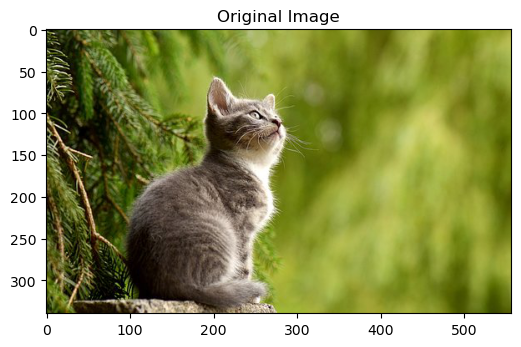

In [2]:
# Showing Original Image
def catImageShow(img,title):
    # channel conversion
    image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,8))
    plt.imshow(img)
    plt.title(title)

    # Display all open figures.
    # plt.show()
    
image_original = plt.imread('../input/cat-image/cat-2083492__340.jpg')
catImageShow(image_original, "Original Image")

**copyMakeBorder()** method is used to create a border around the image like a photo frame. 

**rescale_intensity** is a function of the exposure module that stretches or shrinks the intensity level of the image. rescale_intensity take input of image as NumPy array and also return an image object of NumPy array

**cv2.BORDER_REFLECT**: The border will be mirror reflection of the border elements. Suppose, if image contains letters “abcdefg” then output will be “gfedcba|abcdefg|gfedcba“.

In [3]:
def conv(image, kernel):
    imageH, imageW = image.shape[:2]
    kernelH, kernelW = kernel.shape[:2]
    
#   half padding
    padding = (kernelW-1) //2
    
    image = cv2.copyMakeBorder(image, 
                               padding, padding,
                               padding, padding,
                               cv2.BORDER_REFLECT)
    
    outputMask = np.zeros((imageH, imageW),dtype="float32")
    
#     for y direction as well as image height with padding
    for y in np.arange(padding, imageH+padding):
#         for x direction as well as image width with padding
        for x in np.arange(padding, imageW+padding): 
        
#           ROI - Reason of Interest 
            roi = image[y-padding : y+padding+1, x-padding : x+padding+1]
            k = (roi*kernel).sum()
            outputMask[y-padding, x-padding] = k
            
#   rescalling intesity
    outputMask = rescale_intensity(outputMask, in_range = (0,255))
#   back to original image size
    outputMask = (outputMask*255).astype("uint8")
    return outputMask

In [4]:
imageArgs = {"src": "../input/cat-image/cat-2083492__340.jpg"}

In [5]:
imageSmallBlur= np.ones((7,7), dtype="float") * (1/(7*7))
imageLargeBlur = np.ones((21,21), dtype="float") * (1/(21*21))

In [6]:
imageSmallBlur

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]])

In [7]:
image = cv2.imread(imageArgs['src'])
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray

array([[ 35,  55,  47, ..., 149, 150, 149],
       [ 22,  17,  19, ..., 150, 151, 151],
       [157, 113,  44, ..., 153, 154, 154],
       ...,
       [ 39,  56,  82, ...,  81,  83,  84],
       [ 32,  51,  83, ...,  80,  81,  82],
       [ 32,  49,  77, ...,  79,  80,  81]], dtype=uint8)

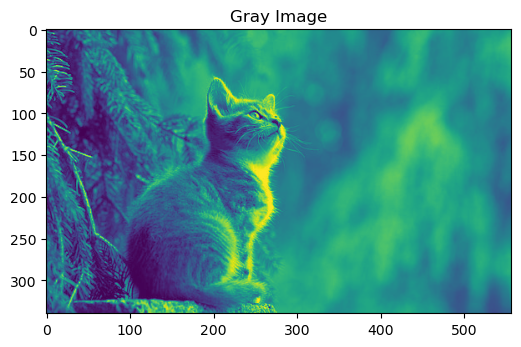

In [8]:
catImageShow(image_gray,'Gray Image')

In [9]:
sharpen = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

In [10]:
image_filtered = cv2.filter2D(image_gray, -1, sharpen)
image_filtered

array([[ 21, 159, 109, ..., 148, 150, 143],
       [  0,   0,   0, ..., 149, 150, 150],
       [255, 166,   0, ..., 156, 155, 154],
       ...,
       [  4,  50, 122, ...,  80,  86,  88],
       [  0,  35, 123, ...,  80,  80,  83],
       [  0,  34,  96, ...,  77,  78,  81]], dtype=uint8)

In [11]:
convImage = conv(image_gray, sharpen)
convImage

array([[ 28, 121,  81, ..., 149, 151, 146],
       [  0,   0,   0, ..., 149, 150, 150],
       [255, 166,   0, ..., 156, 155, 154],
       ...,
       [ 21,  50, 122, ...,  80,  86,  87],
       [  6,  35, 123, ...,  80,  80,  82],
       [ 15,  36, 102, ...,  78,  79,  81]], dtype=uint8)

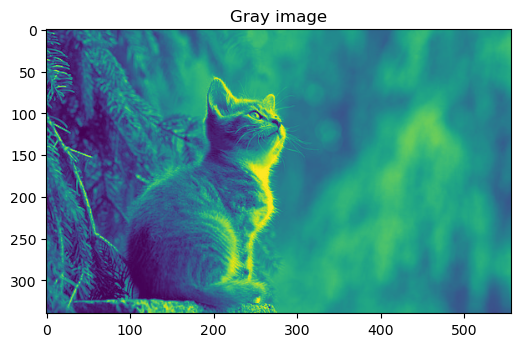

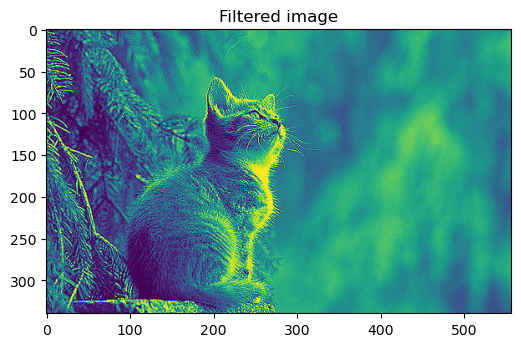

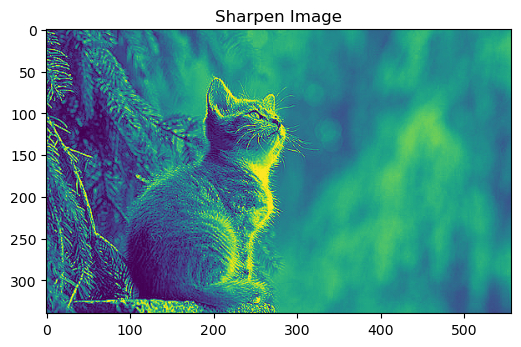

In [12]:
catImageShow(image_gray, "Gray image")
catImageShow(image_filtered, "Filtered image")
catImageShow(convImage,"Sharpen Image")

In [13]:
emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])

In [14]:
filter_emboss = cv2.filter2D(image_gray, -1, emboss)
filter_emboss

array([[ 35,  61,  73, ..., 158, 152, 149],
       [255,  90,   0, ..., 171, 166, 164],
       [255, 255, 255, ..., 180, 175, 172],
       ...,
       [ 10, 164, 158, ...,  82,  84,  78],
       [ 11, 171, 145, ...,  80,  80,  73],
       [ 32, 196, 164, ...,  85,  86,  81]], dtype=uint8)

In [15]:
convImage = conv(image_gray,emboss)
convImage

array([[  6,   0,   0, ..., 161, 155, 152],
       [255,  90,   0, ..., 171, 166, 164],
       [255, 255, 255, ..., 180, 175, 172],
       ...,
       [ 49, 164, 158, ...,  82,  84,  81],
       [ 64, 171, 145, ...,  80,  80,  76],
       [ 83, 182, 142, ...,  82,  83,  81]], dtype=uint8)

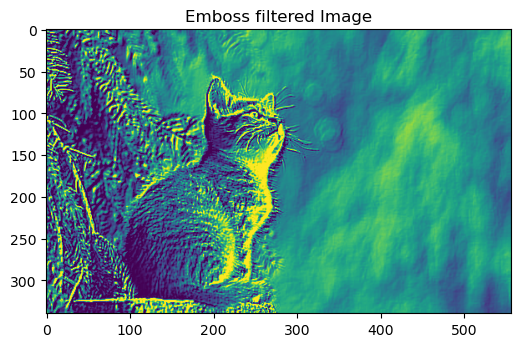

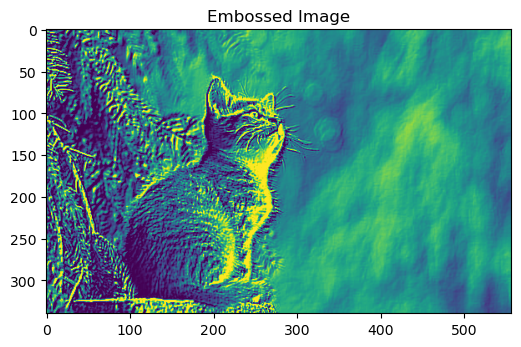

In [16]:
catImageShow(filter_emboss, "Emboss filtered Image")
catImageShow(convImage, "Embossed Image")

In [17]:
outline = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

In [18]:
filter_outline = cv2.filter2D(image_gray, -1, outline)
filter_outline

array([[ 58, 242, 134, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [255, 141,   0, ...,   6,   4,   0],
       ...,
       [  0,   0, 118, ...,   0,   7,  12],
       [  0,   0, 118, ...,   0,   0,   3],
       [  0,   0,  61, ...,   0,   0,   0]], dtype=uint8)

In [19]:
convImage = conv(image_gray, outline)
convImage

array([[  4, 163,  76, ...,   0,   2,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [255, 141,   0, ...,   6,   4,   0],
       ...,
       [  0,   0, 118, ...,   0,   7,   9],
       [  0,   0, 118, ...,   0,   0,   0],
       [  0,   0,  77, ...,   0,   0,   0]], dtype=uint8)

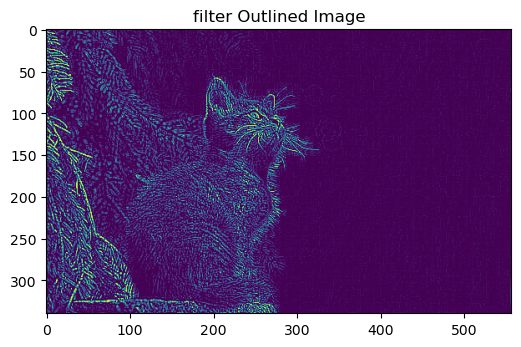

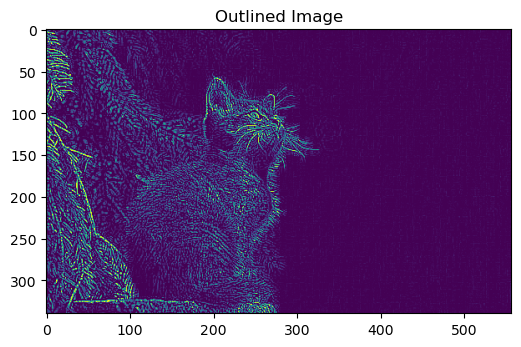

In [20]:
catImageShow(filter_outline, "filter Outlined Image")
catImageShow(convImage, "Outlined Image")

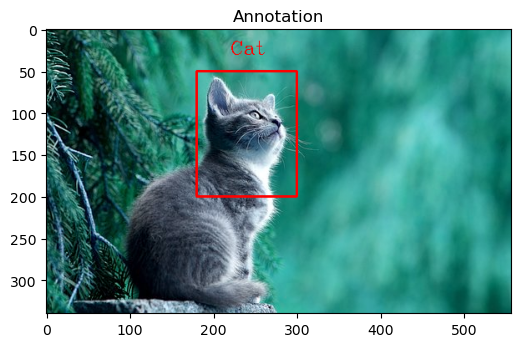

In [21]:
cat = image.copy()
text = "Cat"
coor = (220,30)
cv2.rectangle(cat,(180,50),(300,200),(255,0,0),2,1)
cv2.putText(cat,text,coor,fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.75, color=(255,0,0))
catImageShow(cat,"Annotation")
# cv2.waitKey(0)
# cv2.destroyWindow("Annotation")

## Morphological Analysis

**Morphology** is known as the broad set of image processing operations that process images based on shapes. It is also known as a tool used for extracting image components that are useful in the representation and description of region shape. 

The basic morphological operations are: 

1. Erosion 
2. Dilation
3. Opening
4. Closing
5. Morphological Gradient
6. Top hat
7. Black hat

For all the above techniques the two important requirements are the binary image and a kernel structuring element that is used to slide across the image.

### Image Erosion

Erosion primarily involves eroding the outer surface (the foreground) of the image. As binary images only contain two pixels 0 and 255, it primarily involves eroding the foreground of the image and it is suggested to have the foreground as white. The thickness of erosion depends on the size and shape of the defined kernel.
Erosion shrink-ens the image pixels i.e. it is used for shrinking of element A by using element B.
Erosion removes pixels on object boundaries.:
The value of the output pixel is the minimum value of all the pixels in the neighborhood. A pixel is set to 0 if any of the neighboring pixels have the value 0.

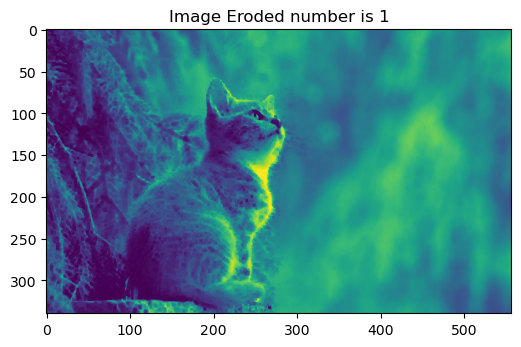

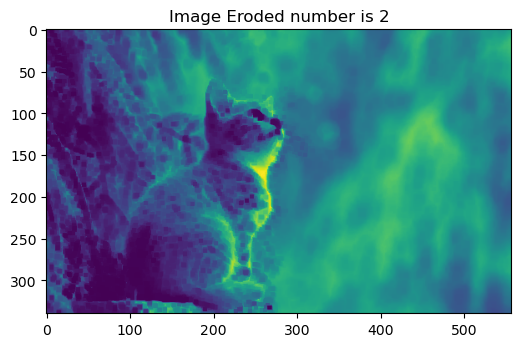

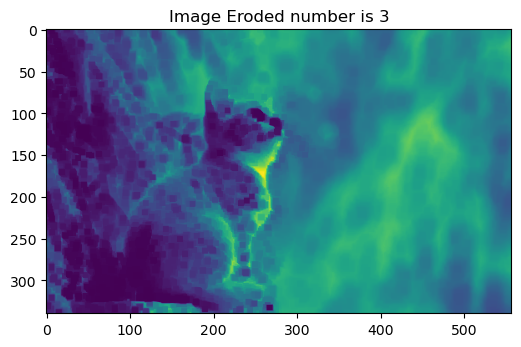

In [22]:
for i in range(0,3):
    imageEroded = cv2.erode(image_gray,None,iterations= i+1)
    catImageShow(imageEroded, "Image Eroded number is {}".format(i+1))

### Dilation

Dilation involves dilating the outer surface (the foreground) of the image. As binary images only contain two pixels 0 and 255, it primarily involves expanding the foreground of the image and it is suggested to have the foreground as white. The thickness of erosion depends on the size and shape of the defined kernel. 

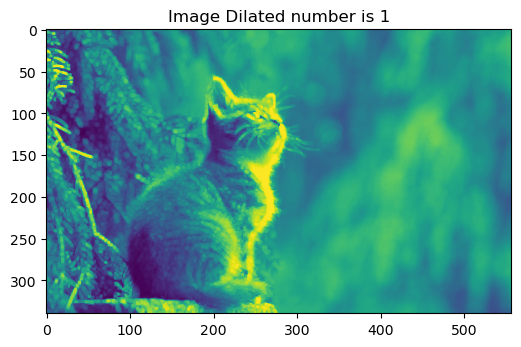

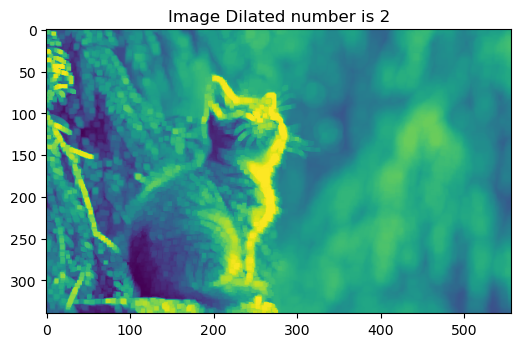

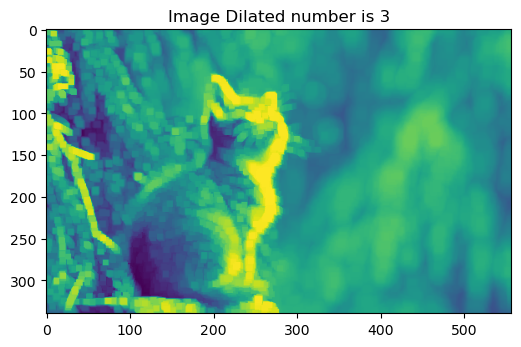

In [23]:
for i in range(0,3):
    imageDilated = cv2.dilate(image_gray,None,iterations= i+1)
    catImageShow(imageDilated, "Image Dilated number is {}".format(i+1))

<table><thead><tr><th>Dilation</th><th>Erosion</th></tr></thead><tbody><tr><td>It increases the size of the objects.</td><td>It decreases the size of the objects.</td></tr><tr><td>It fills the holes and broken areas.</td><td>It removes the small anomalies.</td></tr><tr><td>It connects the areas that are separated by space smaller than structuring element.</td><td>It reduces the brightness of the bright objects.</td></tr><tr><td>It increases the brightness of the objects.</td><td>It removes the objects smaller than the structuring element.</td></tr><tr><td>Distributive, duality, translation and decomposition properties are followed.</td><td>It also follows the different properties like duality etc.</td></tr><tr><td>It is XOR of A and B.</td><td>It is dual of dilation.</td></tr><tr><td>It is used prior in Closing operation.</td><td>It is used later in Closing operation.</td></tr><tr><td>It is used later in Opening operation.</td><td>It is used prior in Opening operation.</td></tr></tbody></table>

### Opening

**Opening** involves erosion followed by dilation in the outer surface (the foreground) of the image. All the above-said constraints for erosion and dilation applies here. It is a blend of the two prime methods. It is generally used to remove the noise in the image.

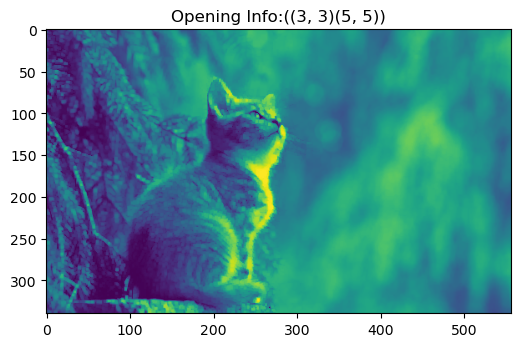

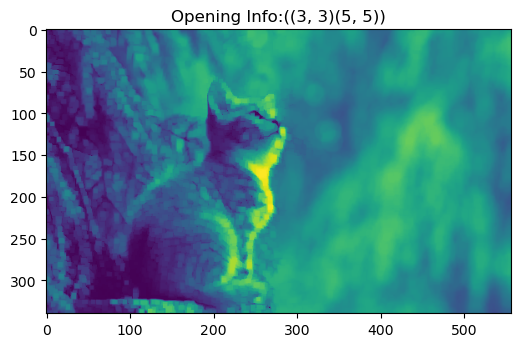

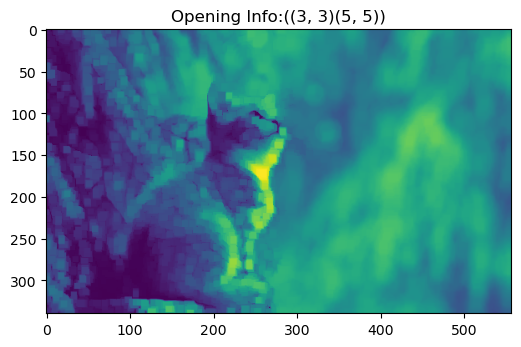

In [24]:
kernel = [(3,3),(5,5),(7,7)]
for i in kernel:
    k = cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, k)
    catImageShow(mo, "Opening Info:({}{})".format(kernel[0],kernel[1]))

### Closing

**Closing** involves dilation followed by erosion in the outer surface (the foreground) of the image. All the above-said constraints for erosion and dilation applies here. It is a blend of the two prime methods. It is generally used to remove the noise in the image.

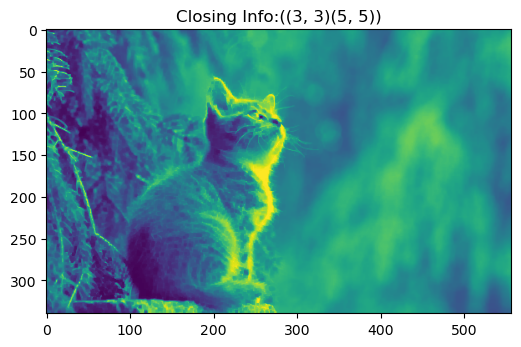

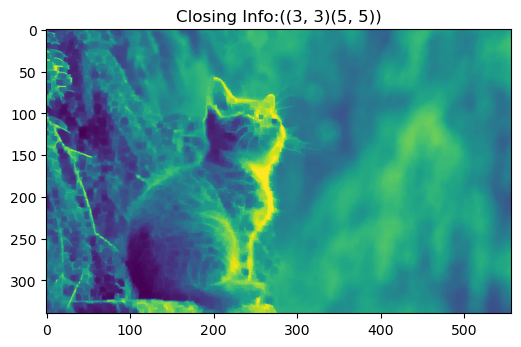

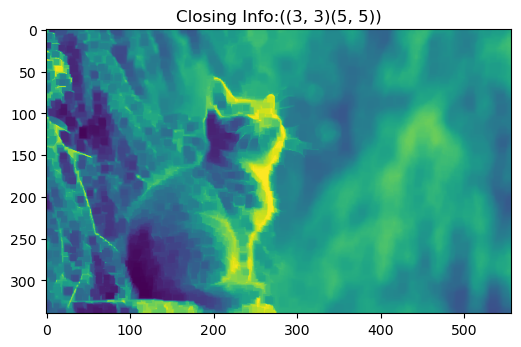

In [25]:
kernel = [(3,3),(5,5),(7,7)]
for i in kernel:
    k = cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, k)
    catImageShow(mo, "Closing Info:({}{})".format(kernel[0],kernel[1]))

### Morphological Gradient

**Morphological gradient** is slightly different than the other operations, because, the morphological gradient first applies erosion and dilation individually on the image and then computes the difference between the eroded and dilated image. The output will be an outline of the given image.

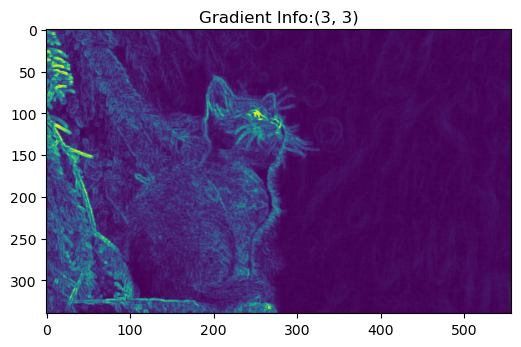

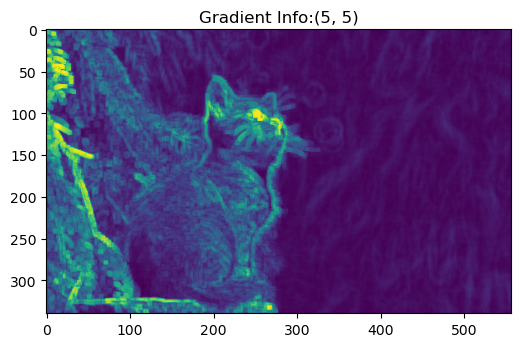

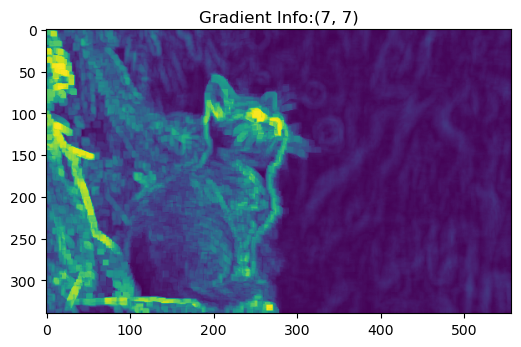

In [26]:
kernel = [(3,3),(5,5),(7,7)]
for i in kernel:
    k = cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(image_gray, cv2.MORPH_GRADIENT, k)
    catImageShow(mo, "Gradient Info:{}".format(i))

### Top Hat

**Top Hat** is yet another morphological operation where Opening is performed on the binary image and the output of this operation is a difference between the input image and the opened image. 

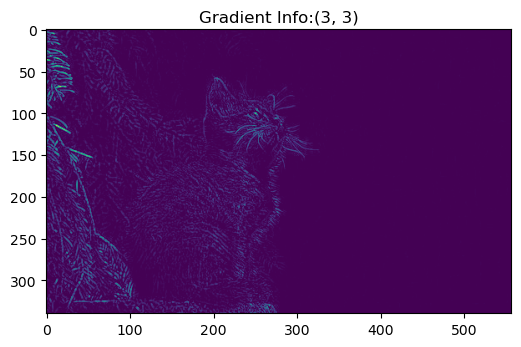

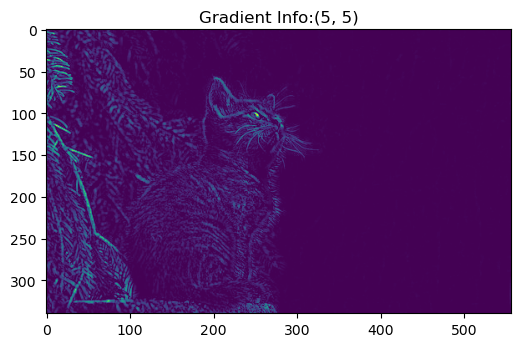

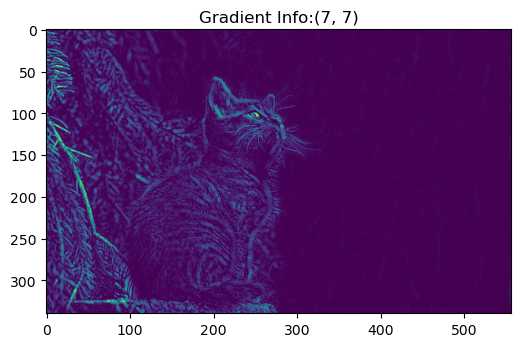

In [27]:
kernel = [(3,3),(5,5),(7,7)]
for i in kernel:
    k = cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(image_gray, cv2.MORPH_TOPHAT, k)
    catImageShow(mo, "Gradient Info:{}".format(i))

### Black Hat

The black-hat operation is used to do the opposite, enhancing dark objects of interest on a bright background. The output of this operation is the difference between the closing of the input image and the input image. 

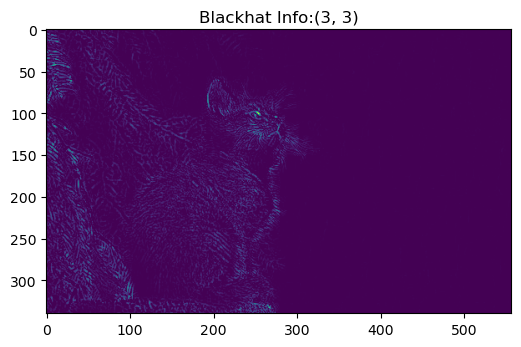

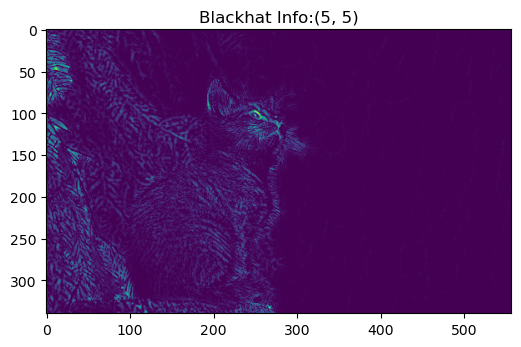

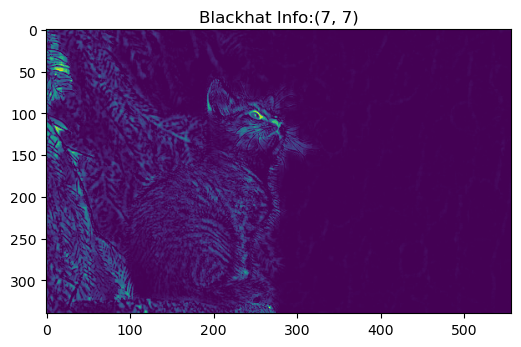

In [28]:
kernel = [(3,3),(5,5),(7,7)]
for i in kernel:
    k = cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(image_gray, cv2.MORPH_BLACKHAT, k)
    catImageShow(mo, "Blackhat Info:{}".format(i))